In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Wordcloud imports
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [3]:
year2018 = pd.read_csv("../datasets/2018.csv", encoding="utf-8", sep=";")
year2019 = pd.read_csv("../datasets/2019.csv", encoding="utf-8", sep=";")
year2020 = pd.read_csv("../datasets/2020.csv", encoding="utf-8", sep=";")
year2021 = pd.read_csv("../datasets/2021.csv", encoding="utf-8", sep=";")
year2022 = pd.read_csv("../datasets/2022.csv", encoding="utf-8", sep=";")

csv_list = [year2018, year2019, year2020, year2021, year2022]


In [55]:
filter_string = "beredskap"

def isolate(df, filter_string):
    new_df = df[df["tittel"].str.contains(filter_string) | df["tittel"].str.contains(filter_string.title())| df["tittel"].str.contains(filter_string.upper())]
    return new_df[['doffin_id', 'tittel']].copy()


ber_year2018 = isolate(year2018, filter_string)
ber_year2019 = isolate(year2019, filter_string)
ber_year2020 = isolate(year2020, filter_string)
ber_year2021 = isolate(year2021, filter_string)
ber_year2022 = isolate(year2022, filter_string)

ber_csv_list = [ber_year2018, ber_year2019, ber_year2020, ber_year2021, ber_year2022]

In [56]:
#making lists of words in title

def generate_word_lists(df):
    list = []
    for index, row in df.iterrows(): 
        title_string = row["tittel"].lower()
        list.extend(title_string.split())
    return list
        
word_list_2018 = generate_word_lists(ber_year2018)
word_list_2019 = generate_word_lists(ber_year2019)
word_list_2020 = generate_word_lists(ber_year2020)
word_list_2021 = generate_word_lists(ber_year2021)
word_list_2022 = generate_word_lists(ber_year2022)

total_word_list = word_list_2018 + word_list_2019 + word_list_2020 + word_list_2021 + word_list_2022

def clean_list(word_list, excluded_words_list):
    for word in word_list:
        if word in excluded_words_list:
            word_list.remove(word)

In [65]:
#Clean word list

excluded_words = [
    "og",
    "med",
    "av",
    "-",
    "til",
    "for",
    "ved",
    "2",
    "1",
    "i",
    "p�",
    "om",
    "innen",
    "kj�p" 
]

clean_list(total_word_list, excluded_words)
print(total_word_list)

['dialogkonferanse', '29', 'november', 'invitasjon', 'marked', 'innleie', '(bareboat', 'charter)', 'to', 'fart�y', 'statlig', 'havg�ende', 'slepeb�tberedskap', 'rfi', 'bruk', 'teknologi', '�', 'velge', 'riktig', 'beredskapsniv�', 'flomfare', 'lillehammer', 'kommune', 'rammeavtale', 'konsulenttjenester', 'sikkerhet', 'beredskap,', 'samt', 'informasjonssikkerhet', '008-2018', 'beredskapshotell', 'beredskapslager', 'pandemipakking', 'konsulenbistand', 'beredskaps-', 'sikkerhetsr�dgivning', 'befolkningsvarslingssystem', 'beredskapsetaten,', 'oslo', 'kommune', 'spr�kvask', 'justis-', 'beredskapsdepartementets', 'publikasjoner', 'mv.', 'omskriving', 'fra', 'bokm�l', 'nynorsk', 'inspeksjon', 'beredskap', 'sj�ledninger', 'b-14', 'branntankbil', 'beredskapsavdelingen', 'bamble', 'kommune', 'k-187306', 'traktor', 'beredskap', 'rammeavtale', 'rullende', 'materiell', 'rammeavtaler', 'vintervei', 'drift:', '1:', 'vinterdrift', 'beredskap.', 'br�yting,', 'str�ing', 'salting', 'hovedveier.', '2:', 'v

In [1]:
def count(elements, dictionary):
    # check if each word has '.' at its last. If so then ignore '.'
    if elements[-1] == '.':
        elements = elements[0:len(elements) - 1]
 
    # if there exists a key as "elements" then simply
    # increase its value.
    if elements in dictionary:
        dictionary[elements] += 1
 
    # if the dictionary does not have the key as "elements"
    # then create a key "elements" and assign its value to 1.
    else:
        dictionary.update({elements: 1})
        

def get_word_frequency(word_list, dictionary):
     
    for elements in word_list:
        count(elements, dictionary)
    
    sorted_dictionary = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
    converted_dictionary = dict(sorted_dictionary)
    
    # print the keys and its corresponding values.
    for allKeys in converted_dictionary:
        print ("Frekvens for ordet: ", allKeys, end = " ")
        print (":", end = " ")
        print (dictionary[allKeys], end = " ")
        print()

In [2]:
dictionary = {}

get_word_frequency(total_word_list, dictionary)


NameError: name 'total_word_list' is not defined

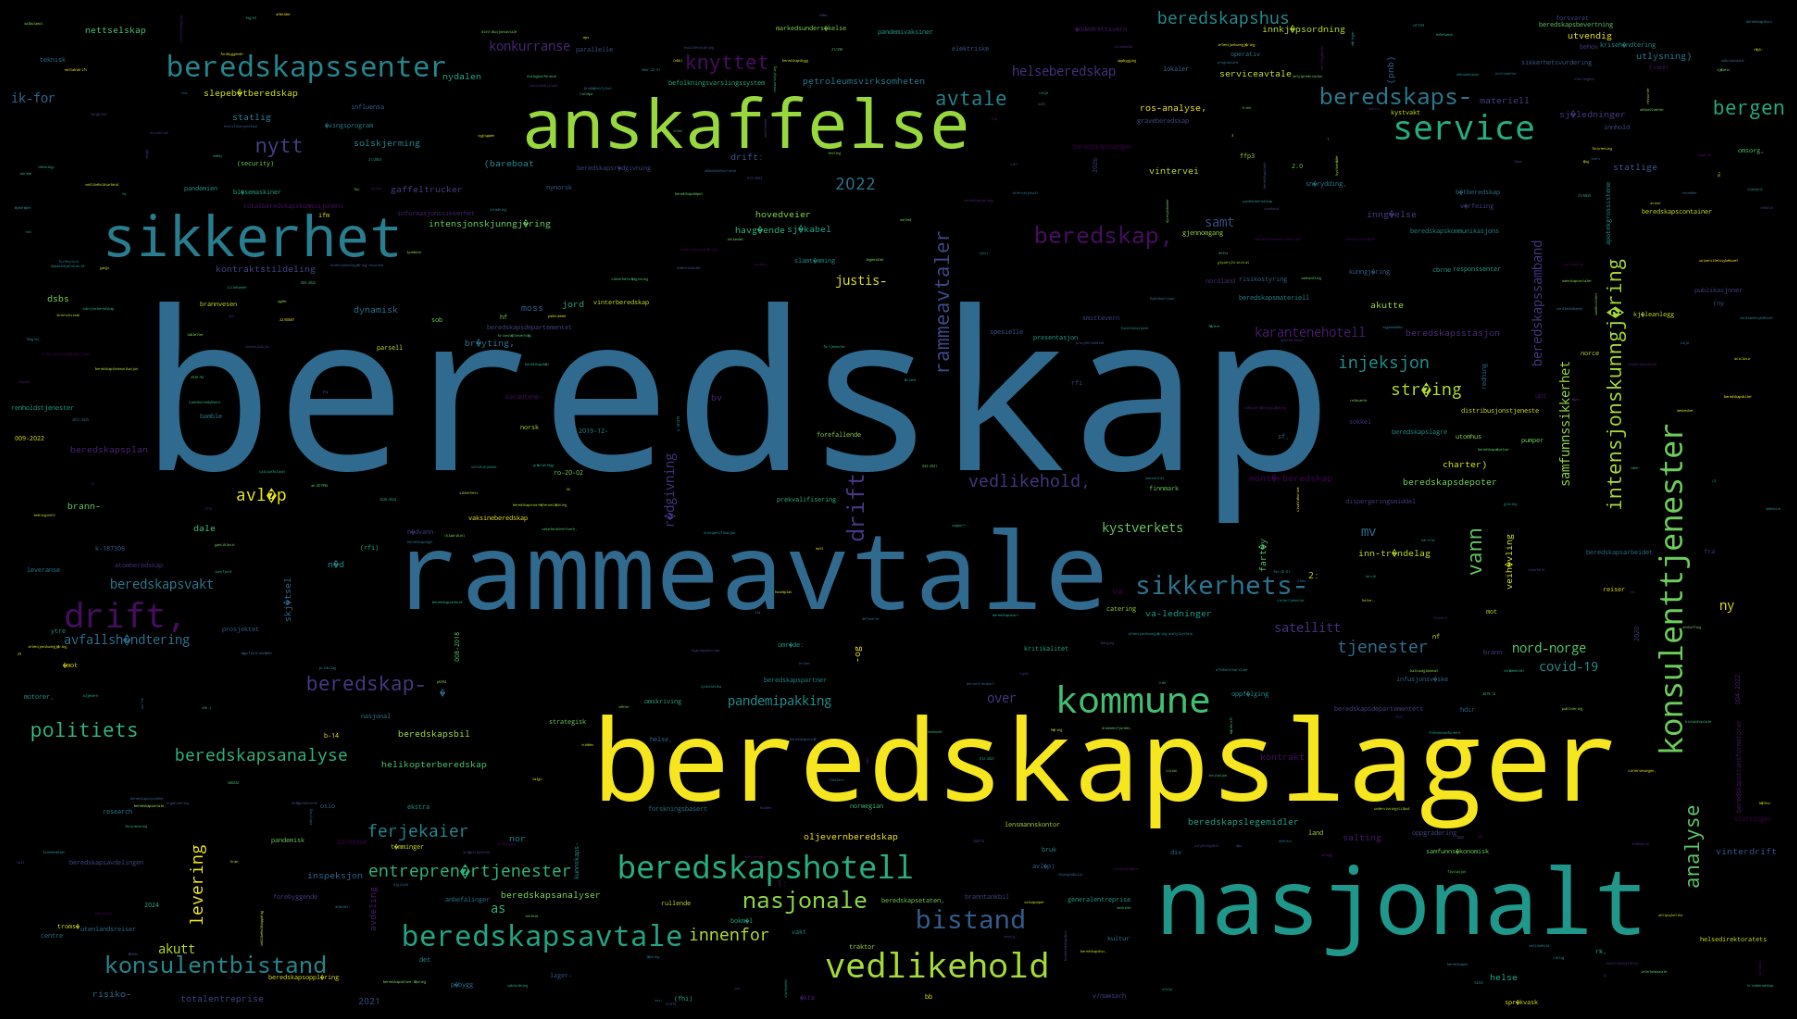

In [73]:
wordcloud = WordCloud(width=1920,height=1080, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictionary)


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()